In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
import warnings

warnings.filterwarnings("ignore")

In [40]:
df = pd.read_excel('traffic.xlsx')

In [41]:
df.head(5)

,Код станции отправления,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Отд. ж/д отгрузки,Код станции назначения,Станция назначения,Регион поставки,Ж/Д поставки,Отд. ж/д поставки,...,Станция отправления загран,Код станции отправления загран,Станция назначения загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения
0,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
1,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
2,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
3,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН
4,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН


In [42]:
df.shape

(36193, 48)

In [43]:
df.columns = df.columns.str.rstrip()
df.columns

Index(['Код станции отправления', 'Станция отправления', 'Регион отгрузки',
       'Ж/Д отгрузки', 'Отд. ж/д отгрузки', 'Код станции назначения',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки',
       'Отд. ж/д поставки', 'Код Клиента', 'Клиент', 'Код отправителя груза',
       'ОКПО отправителя', 'Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'Код получателя груза',
       'ОКПО получателя', 'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Дата отгрузки', 'Дата прибытия',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загран',
       'Код станции 

In [44]:
df.isnull().sum() / len(df) * 100

Код станции отправления            0.000000
Станция отправления                0.002763
Регион отгрузки                    0.002763
Ж/Д отгрузки                       0.002763
Отд. ж/д отгрузки                  0.298400
Код станции назначения             0.000000
Станция назначения                 0.002763
Регион поставки                    0.002763
Ж/Д поставки                       0.002763
Отд. ж/д поставки                  0.696267
Код Клиента                        0.000000
Клиент                             0.000000
Код отправителя груза              0.000000
ОКПО отправителя                   0.000000
Отправитель                        0.013815
ФИО Руководителя Отправителя      29.624513
Почтовый индекс Отправителя       24.932998
Адрес Отправителя                 24.932998
Тел. Отправителя                  25.214821
E-mail Отправителя                96.165004
Факс Отправителя                  33.489901
Код получателя груза               0.000000
ОКПО получателя                 

In [45]:
df['Наименование груза'].unique()

array(['ПРОК ЧЕРМЕТ ПР', 'РЕЛЬСЫ СТАР', 'РЕШЕТКА ПУТЕВ',
       'РЕЛЬСЫ НОВ Р-65', 'ШАРЫ СТ ПОМОЛ', 'ТРУБЫ МЕТ ПР',
       'СТАЛЬ ЛИСТ ПР', 'БАЛКИ СТ НЕС ПР', 'ТРУБЫ СТ БОЛЬШ',
       'ШПУНТЫ МЕТАЛ', 'ШВЕЛЛЕРЫ МЕТ ПР', 'СТАЛЬ СОРТ', 'РЕЛЬСЫ НОВ ПР',
       'ПРОВОЛОКА СТ', 'КОЛЕСА ВАГ НОВ', 'ПОЛОСА СТ ПР', 'ТРУБЫ ЧУГУН',
       'ПРОФИЛИ ГНУТ СТ', 'ТРУБЫ СТ НЕМЕТ', 'ТРУБЫ БЕСШОВ',
       'СТАЛЬ ЛИСТ ТРАН', 'ЛЕНТА СТ ХОЛОД', 'ТРУБЫ НЕРЖАВ',
       'СТАЛЬ ТОНКЛИСТ', 'СТАЛЬ ЛИСТ КРОВ', 'ШТРИПСЫ ЛИСТ', 'КАТАНКА СТ',
       'ПРОФИЛИ СТ ФАС', 'ТРУБЫ ВОДГАЗ ОЦ', 'ТРУБЫ ВОДГАЗ ПР',
       'ШВЕЛЛЕРЫ N10-12', 'МЕТАЛЛОПЛАСТ', 'ШВЕЛЛЕРЫ N20', 'ЖЕСТЬ',
       'ЛЕНТА СТ ГОРЯЧ', 'БАНДАЖИ ЧЕРМЕТ', 'ШВЕЛЛЕРЫ N 14',
       'РЕЛЬСЫ НОВ Р-50', 'ШВЕЛЛЕРЫ N16-18', 'СТОЙКИ РУДН МЕТ',
       'ШВЕЛЛЕРЫ N 5, 8', 'ПРОВОД МНОГЖ СТ'], dtype=object)

In [46]:
data = df[(df['Наименование груза'].str.startswith('СТАЛЬ'))]

In [47]:
data['Наименование груза'].unique()

array(['СТАЛЬ ЛИСТ ПР', 'СТАЛЬ СОРТ', 'СТАЛЬ ЛИСТ ТРАН', 'СТАЛЬ ТОНКЛИСТ',
       'СТАЛЬ ЛИСТ КРОВ'], dtype=object)

In [48]:
# Ненужные столбцы 
columns_to_drop = [
    'Станция отправления загран',
    'Код станции отправления загран',
    'Станция назначения загран',
    'Код станции назначения загран',
    'Отч мес',
    'Отч год',
    'Код страны отправления',
    'Страна отправления',
    'Код страны назначения',
    'Страна назначения',
    'Наименование груза',
    'ОКПО получателя',
    'Станция отправления',
    'Регион отгрузки',
    'Ж/Д отгрузки',
    'Станция назначения',
    'Ж/Д поставки',
    'Клиент',
    'Отправитель',
    'Регион поставки',
    'Отд. ж/д отгрузки',
    'Отд. ж/д поставки'
]

df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36193 entries, 0 to 36192
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Код станции отправления       36193 non-null  int64  
 1   Код станции назначения        36193 non-null  int64  
 2   Код Клиента                   36193 non-null  int64  
 3   Код отправителя груза         36193 non-null  int64  
 4   ОКПО отправителя              36193 non-null  int64  
 5   ФИО Руководителя Отправителя  25471 non-null  object 
 6   Почтовый индекс Отправителя   27169 non-null  float64
 7   Адрес Отправителя             27169 non-null  object 
 8   Тел. Отправителя              27067 non-null  object 
 9   E-mail Отправителя            1388 non-null   object 
 10  Факс Отправителя              24072 non-null  object 
 11  Код получателя груза          36193 non-null  int64  
 12  Получатель                    35980 non-null  object 
 13  Ф

In [49]:
df.isnull().sum() / len(df) * 100

Код станции отправления          0.000000
Код станции назначения           0.000000
Код Клиента                      0.000000
Код отправителя груза            0.000000
ОКПО отправителя                 0.000000
ФИО Руководителя Отправителя    29.624513
Почтовый индекс Отправителя     24.932998
Адрес Отправителя               24.932998
Тел. Отправителя                25.214821
E-mail Отправителя              96.165004
Факс Отправителя                33.489901
Код получателя груза             0.000000
Получатель                       0.588512
ФИО Руководителя получателя     68.656923
Почтовый индекс получателя      56.801039
Адрес получателя                56.801039
Тел. получателя                 60.539331
E-mail Получателя               97.190064
Факс получателя                 83.433261
Код груза                        0.000000
Вес груза, тонн                  0.000000
Количество вагонов               0.000000
Тонно-километры                  0.000000
Дата отгрузки                    0

In [50]:
# дропаем пропуски
miss = df.isnull().sum() / len(df) * 100

to_drop = miss[miss > 20].index

df = df.drop(columns=to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36193 entries, 0 to 36192
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Код станции отправления  36193 non-null  int64  
 1   Код станции назначения   36193 non-null  int64  
 2   Код Клиента              36193 non-null  int64  
 3   Код отправителя груза    36193 non-null  int64  
 4   ОКПО отправителя         36193 non-null  int64  
 5   Код получателя груза     36193 non-null  int64  
 6   Получатель               35980 non-null  object 
 7   Код груза                36193 non-null  int64  
 8   Вес груза, тонн          36193 non-null  float64
 9   Количество вагонов       36193 non-null  int64  
 10  Тонно-километры          36193 non-null  int64  
 11  Дата отгрузки            36193 non-null  int64  
 12  Дата прибытия            36193 non-null  int64  
 13  Характер перевозок       36193 non-null  object 
dtypes: float64(1), int64(1

In [51]:
df.describe()

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Дата отгрузки,Дата прибытия
count,36193.000000,36193.000000,3.619300e+04,36193.000000,3.619300e+04,36193.000000,36193.000000,36193.000000,36193.000000,3.619300e+04,36193.000000,36193.000000
mean,62291.202719,54621.314619,1.438231e+09,5061.933495,1.208939e+07,4990.089686,32366.476998,159.380563,3.344846,1.973440e+05,1701.600752,1582.627552
std,24057.102607,29199.131989,1.449050e+09,1968.729813,2.313906e+07,2653.874166,87.031958,283.972100,7.686106,5.589945e+05,869.471239,910.404405
min,1300.000000,1000.000000,0.000000e+00,30.000000,0.000000e+00,12.000000,32101.000000,0.000000,0.000000,0.000000e+00,104.000000,105.000000
25%,43860.000000,23790.000000,1.000232e+09,3503.000000,1.863870e+05,2864.000000,32307.000000,64.030000,1.000000,4.953600e+04,1005.000000,805.000000
50%,77000.000000,61660.000000,1.001351e+09,5010.000000,1.866310e+05,5089.000000,32411.000000,68.063000,1.000000,1.069280e+05,1804.000000,1605.000000
75%,81760.000000,80130.000000,1.003305e+09,5865.000000,5.757848e+06,6856.000000,32416.000000,135.280000,2.000000,1.932850e+05,2504.000000,2405.000000
max,99630.000000,99810.000000,7.000118e+09,9999.000000,9.995542e+07,9999.000000,32423.000000,7344.600000,118.000000,3.580672e+07,3105.000000,3105.000000


In [52]:
df.columns

Index(['Код станции отправления', 'Код станции назначения', 'Код Клиента',
       'Код отправителя груза', 'ОКПО отправителя', 'Код получателя груза',
       'Получатель', 'Код груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Дата отгрузки', 'Дата прибытия',
       'Характер перевозок'],
      dtype='object')

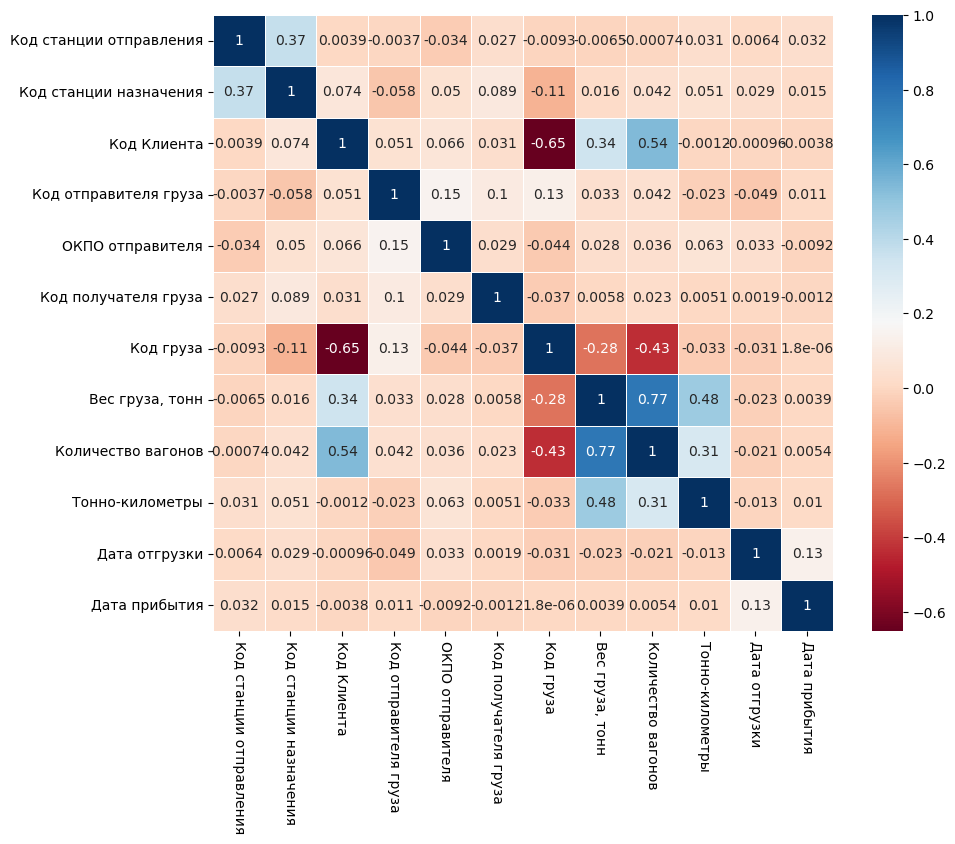

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap="RdBu", linewidths=0.5)

plt.xticks(rotation=-90)

plt.show()


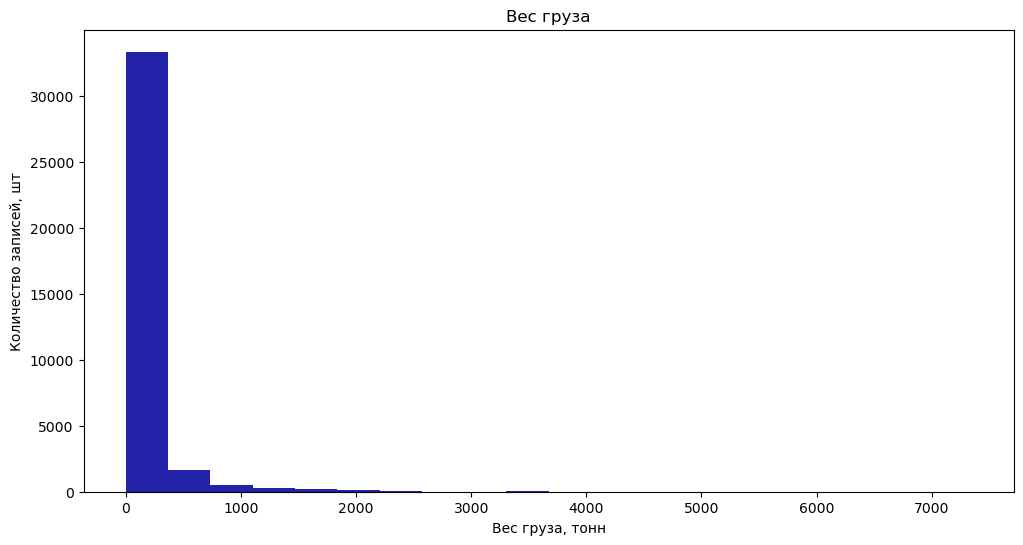

In [54]:
plt.figure(figsize=(12, 6))

plt.hist(df['Вес груза, тонн'], bins=20, color='#2222AA')

plt.title('Вес груза')

plt.xlabel('Вес груза, тонн')
plt.ylabel('Количество записей, шт')

plt.show();

In [55]:
df.head(5)

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Получатель,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Дата отгрузки,Дата прибытия,Характер перевозок
0,86420,84480,1002743862,5003,5757676,5191,00000000,32411,67.460,1,45536,2405,2505,Экспорт
1,86420,84480,1002743862,5003,5757676,5191,00000000,32411,67.680,1,45684,2805,3005,Экспорт
2,86420,84480,1002743862,5003,5757676,5191,00000000,32411,265.350,4,179112,3004,105,Экспорт
3,86420,84480,1002743862,5003,5757676,5244,50720107,32411,66.688,1,45014,1805,2005,Экспорт
4,86420,84480,1002743862,5003,5757676,5244,50720107,32411,67.520,1,45576,2205,2405,Экспорт


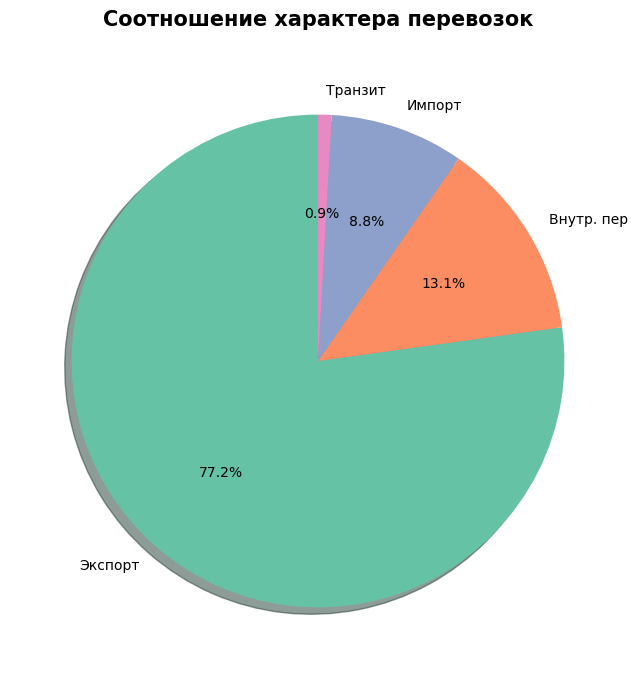

In [56]:
plt.figure(figsize=(8, 8))
plt.pie(
    df['Характер перевозок'].value_counts(), 
    labels=df['Характер перевозок'].unique(), 
    autopct='%1.1f%%', 
    startangle=90,
    colors=sns.color_palette('Set2'),
    shadow=True
)

plt.rcParams["font.serif"] = "Times New Roman"
plt.title(
    label="Соотношение характера перевозок", 
    fontdict={"fontsize":15, "fontweight": "bold"},
    pad=20
)

plt.show();


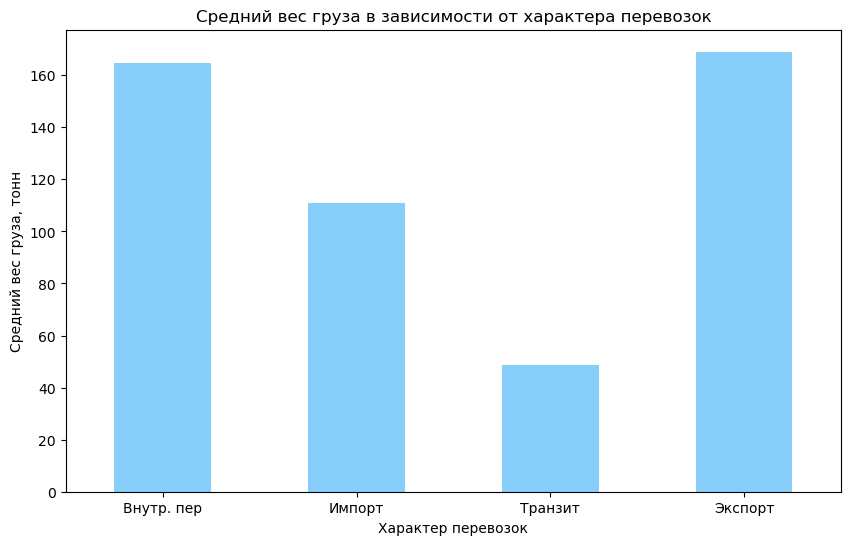

In [57]:
avg_weight_by_type = df.groupby('Характер перевозок')['Вес груза, тонн'].mean()

plt.figure(figsize=(10, 6))
avg_weight_by_type.plot(kind='bar', color='LightSkyBlue')
plt.title('Средний вес груза в зависимости от характера перевозок')




plt.ylabel('Средний вес груза, тонн')
plt.xticks(rotation=0)

plt.show();


In [58]:
# Кодирование нужного столбца для модели
df_encoded = pd.get_dummies(df, columns=['Характер перевозок'])

In [59]:
# Преобразуем столбцы

def formate_up_to_four(string):
    string = str(string)

    if len(string) == 3:
        return '0' + string

    return string


df_encoded['Дата отгрузки'] = df_encoded['Дата отгрузки'].apply(formate_up_to_four)
df_encoded['Дата прибытия'] = df_encoded['Дата прибытия'].apply(formate_up_to_four)

df_encoded[['Дата отгрузки', 'Дата прибытия']].head(5)

,Дата отгрузки,Дата прибытия
0,2405,2505
1,2805,3005
2,3004,0105
3,1805,2005
4,2205,2405


In [60]:
df.head(5)

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Получатель,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Дата отгрузки,Дата прибытия,Характер перевозок
0,86420,84480,1002743862,5003,5757676,5191,00000000,32411,67.460,1,45536,2405,2505,Экспорт
1,86420,84480,1002743862,5003,5757676,5191,00000000,32411,67.680,1,45684,2805,3005,Экспорт
2,86420,84480,1002743862,5003,5757676,5191,00000000,32411,265.350,4,179112,3004,105,Экспорт
3,86420,84480,1002743862,5003,5757676,5244,50720107,32411,66.688,1,45014,1805,2005,Экспорт
4,86420,84480,1002743862,5003,5757676,5244,50720107,32411,67.520,1,45576,2205,2405,Экспорт


In [61]:
df_encoded['Дата отгрузки'] = pd.to_datetime(df_encoded['Дата отгрузки'], format='%d%m')
df_encoded['Дата прибытия'] = pd.to_datetime(df_encoded['Дата прибытия'], format='%d%m')

In [62]:
df_encoded.head()

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Получатель,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Дата отгрузки,Дата прибытия,Характер перевозок_Внутр. пер,Характер перевозок_Импорт,Характер перевозок_Транзит,Характер перевозок_Экспорт
0,86420,84480,1002743862,5003,5757676,5191,00000000,32411,67.460,1,45536,1900-05-24,1900-05-25,0,0,0,1
1,86420,84480,1002743862,5003,5757676,5191,00000000,32411,67.680,1,45684,1900-05-28,1900-05-30,0,0,0,1
2,86420,84480,1002743862,5003,5757676,5191,00000000,32411,265.350,4,179112,1900-04-30,1900-05-01,0,0,0,1
3,86420,84480,1002743862,5003,5757676,5244,50720107,32411,66.688,1,45014,1900-05-18,1900-05-20,0,0,0,1
4,86420,84480,1002743862,5003,5757676,5244,50720107,32411,67.520,1,45576,1900-05-22,1900-05-24,0,0,0,1


In [63]:
# Делаем доп. столбец разгрузки
def time(row):
    return row['Дата прибытия'] - row['Дата отгрузки']

df_encoded['День разгрузки'] = df_encoded.apply(time, axis=1).dt.days

In [64]:
# Удаляем использованные столбцы 
df_encoded = df_encoded.drop(columns=['Дата отгрузки', 'Дата прибытия'])

In [65]:
df_encoded.head()

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Получатель,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Характер перевозок_Внутр. пер,Характер перевозок_Импорт,Характер перевозок_Транзит,Характер перевозок_Экспорт,День разгрузки
0,86420,84480,1002743862,5003,5757676,5191,00000000,32411,67.460,1,45536,0,0,0,1,1
1,86420,84480,1002743862,5003,5757676,5191,00000000,32411,67.680,1,45684,0,0,0,1,2
2,86420,84480,1002743862,5003,5757676,5191,00000000,32411,265.350,4,179112,0,0,0,1,1
3,86420,84480,1002743862,5003,5757676,5244,50720107,32411,66.688,1,45014,0,0,0,1,2
4,86420,84480,1002743862,5003,5757676,5244,50720107,32411,67.520,1,45576,0,0,0,1,2


In [66]:
df_encoded = df_encoded.drop(columns='Получатель')

In [67]:
df_encoded.columns

Index(['Код станции отправления', 'Код станции назначения', 'Код Клиента',
       'Код отправителя груза', 'ОКПО отправителя', 'Код получателя груза',
       'Код груза', 'Вес груза, тонн', 'Количество вагонов', 'Тонно-километры',
       'Характер перевозок_Внутр. пер', 'Характер перевозок_Импорт',
       'Характер перевозок_Транзит', 'Характер перевозок_Экспорт',
       'День разгрузки'],
      dtype='object')

In [68]:
X = df_encoded.drop(columns=['День разгрузки'])
y = df_encoded['День разгрузки']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from tpot import TPOTRegressor
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#Импортировал все необходимое

In [70]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
tpot = TPOTRegressor(generations=3, population_size=20, scoring='neg_mean_absolute_error', verbosity=2, random_state=42, n_jobs=-1)

#Настроил tpot


In [71]:
X_train.shape

(28954, 14)

In [72]:
tpot.fit(X_train, y_train)
#Обучил auto-ml и посмотрел лучшую модель

Optimization Progress:   0%|          | 0/80 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.4198830129171343

Generation 2 - Current best internal CV score: -1.4198830129171343

Generation 3 - Current best internal CV score: -1.4198830129171343

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=6, min_samples_split=4, n_estimators=100)


TPOTRegressor(generations=3, n_jobs=-1, population_size=20, random_state=42,
              scoring='neg_mean_absolute_error', verbosity=2)

In [73]:
# Предсказание на тестовых данных
y_pred = tpot.predict(X_test)

print('r2_score = ', r2_score(y_test, y_pred))
print('mae = ', mean_absolute_error(y_test, y_pred))
print('rmse = ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score =  0.6580514187737019
mae =  1.417467145403864
rmse =  2.5211713285523927


In [74]:
from sklearn.neighbors import KNeighborsRegressor

neighbor = KNeighborsRegressor(n_neighbors = 10, leaf_size = 20)

neighbor.fit(X_train, y_train)

y_hat = neighbor.predict(X_test)
print('r2_score = ', r2_score(y_test, y_hat))
print('mae =', mean_absolute_error(y_test, y_hat))
print('rmse = ', np.sqrt(mean_squared_error(y_test, y_hat)))

r2_score =  0.48437752838676496
mae = 1.767150158861721
rmse =  3.095906775447216


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('r2_score = ', r2)
print('mae = ', mean_absolute_error(y_test, y_hat))
print('rmse = ', np.sqrt(mse))

r2_score =  0.6558123237226474
mae =  1.767150158861721
rmse =  2.529412233068082


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer

# Данные
grad = GradientBoostingRegressor()
parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}

# Обучение модели
grid_search = GridSearchCV(grad, parameters, scoring={'MSE': make_scorer(mean_squared_error), 'R^2': make_scorer(r2_score)}, refit='R^2', cv=3)
grid_search.fit(X_train, y_train)

# Результаты
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Оценка на тест данных
y_pred_best = best_estimator.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print('Best Par = ', best_params)
print('mae = ', mean_absolute_error(y_test, y_hat))
print('Best r2_score = ', r2_best)
print('Best rmse = ', np.sqrt(mse_best))

Best Par =  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
mae =  1.767150158861721
Best r2_score =  0.7006785011478963
Best rmse =  2.358798875873137


In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE')

model.fit(X_train, y_train, verbose=100)

Learning rate set to 0.069683
0:	learn: 4.0275062	total: 56.6ms	remaining: 56.5s
100:	learn: 2.5313934	total: 556ms	remaining: 4.95s
200:	learn: 2.3556991	total: 1.04s	remaining: 4.15s
300:	learn: 2.2518899	total: 1.52s	remaining: 3.54s
400:	learn: 2.1870782	total: 2.04s	remaining: 3.04s
500:	learn: 2.1353376	total: 2.51s	remaining: 2.5s
600:	learn: 2.0906002	total: 3s	remaining: 1.99s
700:	learn: 2.0553258	total: 3.48s	remaining: 1.48s
800:	learn: 2.0222401	total: 3.95s	remaining: 982ms
900:	learn: 1.9930547	total: 4.41s	remaining: 485ms
999:	learn: 1.9697486	total: 4.86s	remaining: 0us


In [ ]:
from sklearn.metrics import mean_squared_error as mse

y_tr = model.predict(X_train)
y_val = model.predict(X_test)

print('mae = ', mean_absolute_error(y_test, y_val))

In [ ]:

y_tr = model.predict(X_train)
y_val = model.predict(X_test)

print('mae = ', mean_absolute_error(y_test, y_val))

In [ ]:
import shap

In [ ]:
# Shap модели Catboost
explainer = shap.Explainer(model)
shap_model = explainer.shap_values(X_test)

# SHAP для TPOT модели
explainer_tpot = shap.Explainer(y_pred)
shap_tpot = explainer_tpot.shap_values(X_test)

#### График показывает насколько важен каждый признак для обучения модели

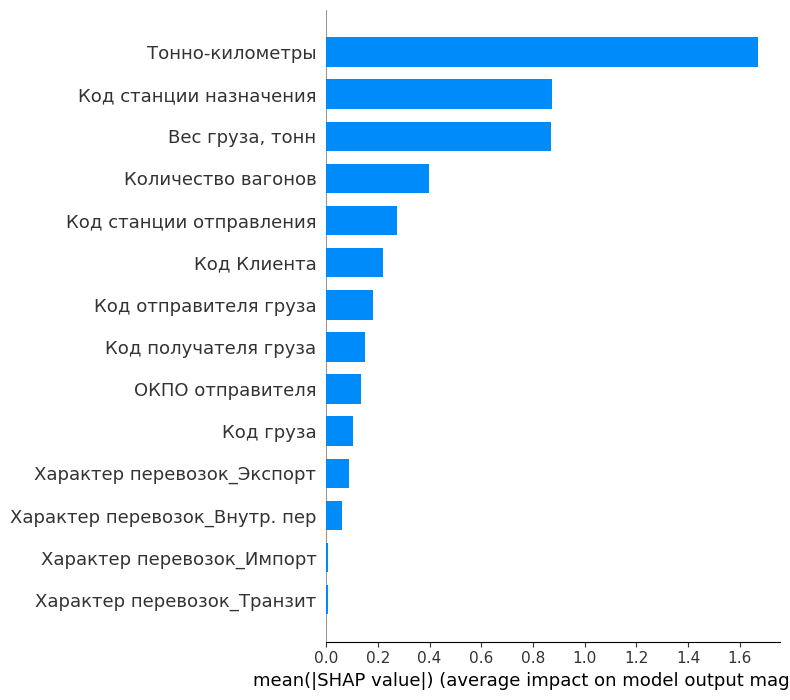

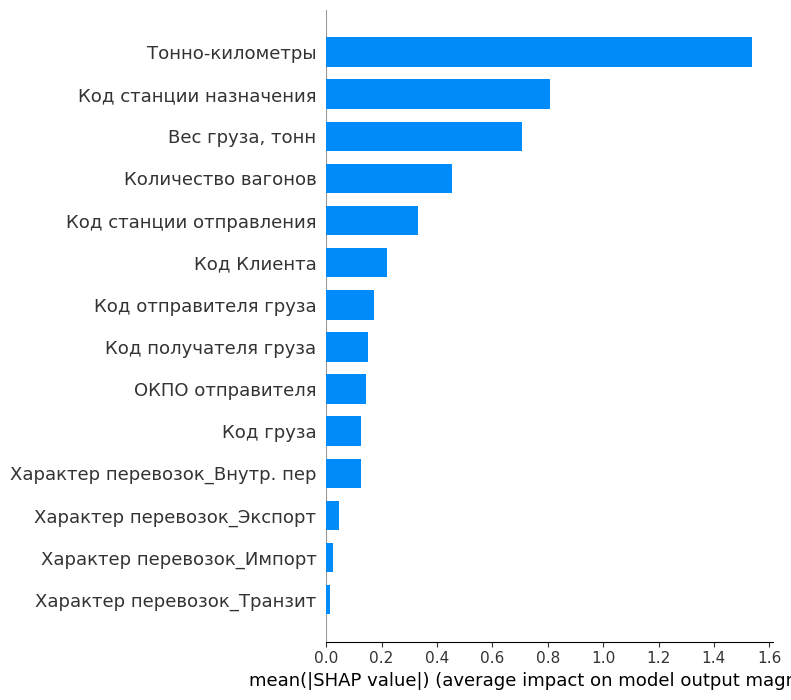

In [ ]:
shap.summary_plot(shap_model, X_test, plot_type="bar")

shap.summary_plot(shap_tpot, X_test, plot_type="bar")

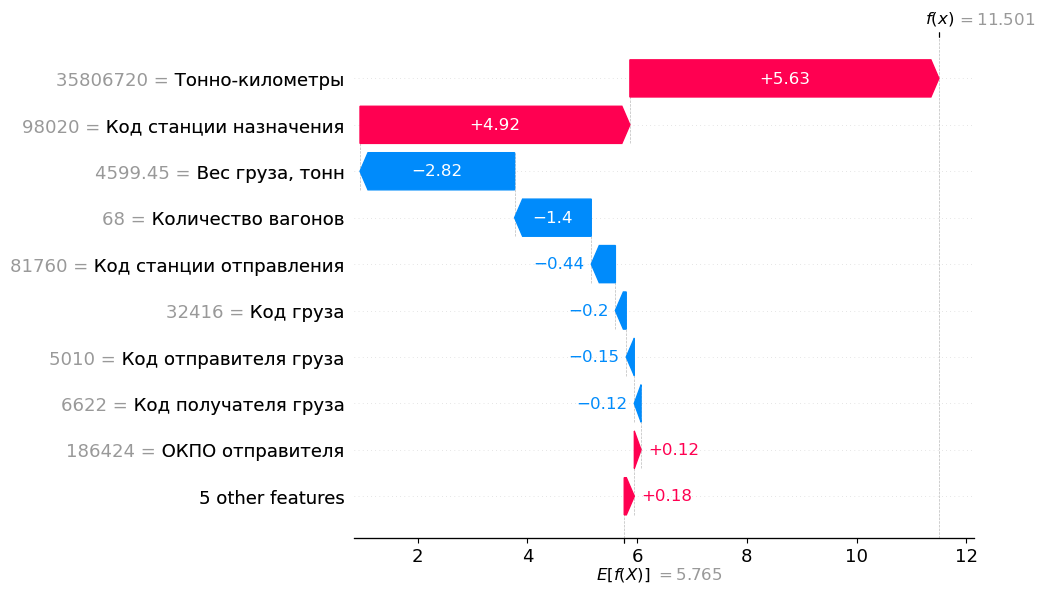

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[df['Тонно-километры'].idxmax()])

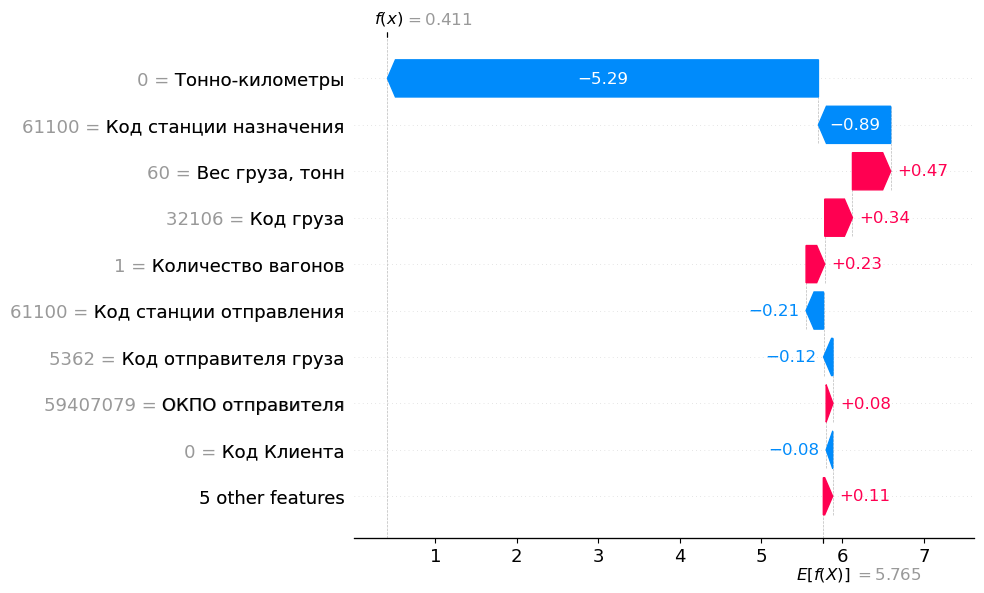

In [ ]:
max_tonno = df['Тонно-километры'].idxmin()

explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[df['Тонно-километры'].idxmin()])

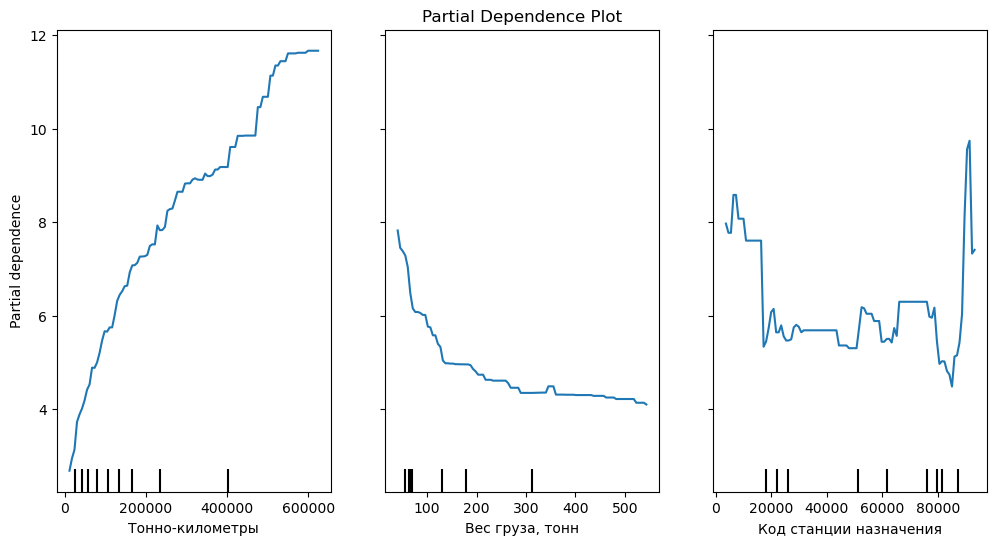

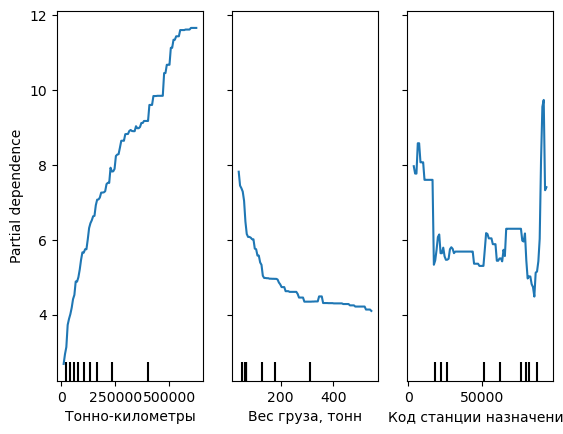

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fix, ax = plt.subplots(figsize=(12, 6))

display = PartialDependenceDisplay.from_estimator(
    model, df_encoded, ["Тонно-километры", "Вес груза, тонн", 'Код станции назначения'], ax=ax
)

display.plot();